# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
# Imports
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz
 99%|█████████▉| 26181632/26421880 [00:09<00:00, 2915233.37it/s]Extracting F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw

0it [00:00, ?it/s]Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz

  0%|          | 0/29515 [00:00<?, ?it/s]
32768it [00:00, 75107.40it/s]                            

0it [00:00, ?it/s]Extracting F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to F_MNIST_data/FashionMNIST/raw

 92%|█████████▏| 4055040/4422102 [00:02<00:00, 2470651.83it/s]
4423680it [00:02, 1828352.18it/s]

0it [00:00, ?it/s]Extracting F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to F_MNIST_data/FashionMNIST/raw

8192it [00:00, 24797.70it/s]            
Ex

Here we can see one of the images.

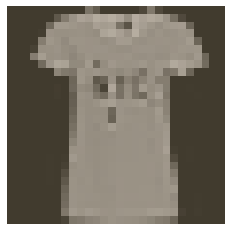

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

from collections import OrderedDict

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [6]:
# Define your network architecture here

# Define layer sizes
input_size = 784
layer_size = [400, 200, 100]
output_size = 10

# Define model architecture
architecture = OrderedDict([
    ('input', nn.Linear(input_size, layer_size[0])),
    ('relu1', nn.ReLU()),
    ('fc1', nn.Linear(layer_size[0], layer_size[1])),
    ('relu2', nn.ReLU()),
    ('fc2', nn.Linear(layer_size[1], layer_size[2])),
    ('relu3', nn.ReLU()),
    ('logits', nn.Linear(layer_size[2], output_size))
])

# Instantiate model
model = nn.Sequential(architecture)

# View
model

Sequential(
  (input): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc1): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=100, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [7]:
# Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [8]:
# Train the network here
# Number of times through the dataset
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    # iterate through each of the images/labels
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        # Clear out the gradients to re-calculate
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)        # loss is a scaler tensor
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()    # Need to get the value out of the scaler tensor
        
        # Print every 40 steps so we can see the steps being taken
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3...  Loss: 2.2915
Epoch: 1/3...  Loss: 2.2525
Epoch: 1/3...  Loss: 2.1944
Epoch: 1/3...  Loss: 2.1211
Epoch: 1/3...  Loss: 1.9870
Epoch: 1/3...  Loss: 1.7903
Epoch: 1/3...  Loss: 1.5856
Epoch: 1/3...  Loss: 1.3845
Epoch: 1/3...  Loss: 1.2456
Epoch: 1/3...  Loss: 1.1213
Epoch: 1/3...  Loss: 1.0557
Epoch: 1/3...  Loss: 0.9840
Epoch: 1/3...  Loss: 0.9459
Epoch: 1/3...  Loss: 0.8779
Epoch: 1/3...  Loss: 0.8424
Epoch: 1/3...  Loss: 0.8199
Epoch: 1/3...  Loss: 0.7741
Epoch: 1/3...  Loss: 0.7618
Epoch: 1/3...  Loss: 0.7895
Epoch: 1/3...  Loss: 0.7330
Epoch: 1/3...  Loss: 0.7205
Epoch: 1/3...  Loss: 0.6997
Epoch: 1/3...  Loss: 0.7016
Epoch: 2/3...  Loss: 0.3906
Epoch: 2/3...  Loss: 0.6846
Epoch: 2/3...  Loss: 0.6842
Epoch: 2/3...  Loss: 0.6420
Epoch: 2/3...  Loss: 0.6399
Epoch: 2/3...  Loss: 0.6613
Epoch: 2/3...  Loss: 0.6170
Epoch: 2/3...  Loss: 0.6223
Epoch: 2/3...  Loss: 0.6249
Epoch: 2/3...  Loss: 0.6240
Epoch: 2/3...  Loss: 0.6424
Epoch: 2/3...  Loss: 0.6026
Epoch: 2/3...  Loss:

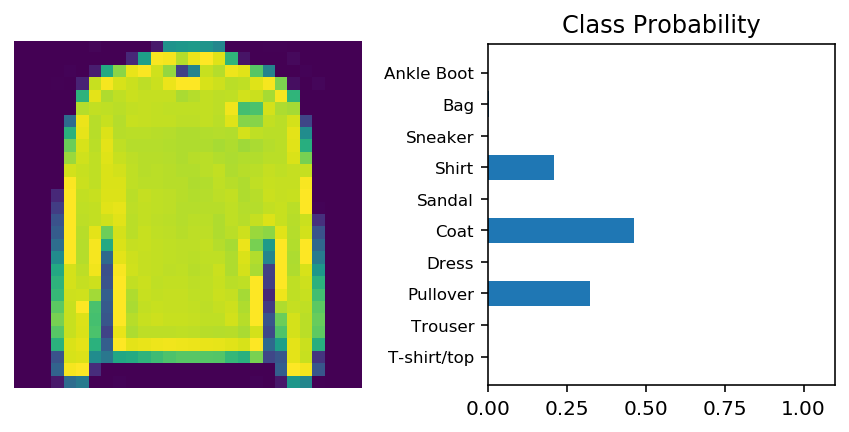

In [10]:
# Test out your network!

# Get images and labels
dataiter = iter(testloader)
images, labels = dataiter.next()

# Test image
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.